# BAX 452
### Session 4:  Duration 5:45 pm - 8:30 pm w/ 15 minute Break
* Quiz 4:  5:45pm-6pm
* Review Homework Assignment 3 (Class Discussion):  6pm-6:30pm
* Lecture Part 1:  ML Overview:  6:30pm-7pm
* Break:  7pm-7:15pm
* Lecture Part 2:  Linear Regression in Machine Learning:  7:15pm-8pm
* Project Team Case Study:  Predicting Home Prices 8pm-8:30pm


## Quiz 4: 5:45pm-6pm

## Review Homework Assignment 3 (Class Discussion): 6pm-6:30pm

* What issues came up with doing faceted plotting in ggplot?
* Why does clustering fit well with faceted plotting?
* What did you discover using a correlation heatmap on your dataset?
* What conclusions can be made from the experimentations on test and training Data ratios?
* Does anyone have a project they wish to share?


## Machine Learning Overview: 6:30pm-7pm


## Machine Learning Feedback Loop

* collecting data
* exploring (EDA) and preparing the data:  80% of the work
* training a model on the data
* evaluating model performance
* Improving model performance, if needed

![ML Pipeline Overview](https://user-images.githubusercontent.com/58792/35464450-d79e5804-02aa-11e8-84ba-77cee13af3c3.png)

## High Level R ML Pipeline (Using Caret Library)

```R
#combine all data from facebook, twitter and wikipedia
combined_model <- function(analytics_file){
	fb_data <- clean_facebook_data(analytics_file,10,10)
	tw_data <- clean_twitter_data(analytics_file,10)
	wiki_data <- clean_wikipedia(analytics_file, 3)
	combined <- merge(fb_data,tw_data,by='author_id')
	combined <- merge(combined,wiki_data,by='author_id')
	return(combined)
}

#determine knn clustering from combined model
caret_knn <- function(knn_set, observed){
	knnFit <- train(knn_set, observed,
                method="knn", preProc=c("center", "scale"),
                tuneLength = 30,trainControl(method="cv"))
	return(knnFit)
}


#Read in the data, clean it up, and create test and training set
prepare_network_data <- function(analytics_file, desired_cols, post_col) {
    data <- clean_data(analytics_file, desired_cols, post_col, min_posts=10)

    #Add grouping column by finding rows
    data$gp <- runif(dim(data)[1])
    test_set <- subset(data, gp <= 0.2)
    training_set <- subset(data, gp > 0.2)
    network_metadata <- list(data,test_set, training_set)
    return(network_metadata)
}

#calculates Mean Absolute Error
MAE <- function(actual, predicted){
    result <- mean(abs(actual - predicted))
    return(result)
}
```

In [1]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns; sns.set(color_codes=True)
from sklearn.cluster import KMeans
color = sns.color_palette()
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline
df = pd.read_csv("https://raw.githubusercontent.com/noahgift/ucdmsba-machine-learning/master/data/celebrity_rank.csv")
df.head(10)

,twitter_rank,facebook_rank,other_rank,page_views,number_of_posts,median_page_views_post,cum pageviews,total pageviews,cum percentage pageviews
0,59,6,45,238871,59,943.000,238871,1932905,12.36%
1,52,7,159,169154,119,675.500,408025,1932905,21.11%
2,3,2,153,165224,13,9448.000,573249,1932905,29.66%
3,1,3,152,118696,10,10761.000,691945,1932905,35.80%
4,10,4,154,107180,7,5864.000,799125,1932905,41.34%
5,6,30,156,94387,31,1265.000,893512,1932905,46.23%
6,2,35,155,92604,31,2604.000,986116,1932905,51.02%
7,38,19,165,78262,24,252.000,1064378,1932905,55.07%
8,11,5,126,46037,14,1864.500,1110415,1932905,57.45%
9,75,10,163,42456,45,419.000,1152871,1932905,59.64%


## Non-Linear Relationship Doesn't Work Great with Vanilla Linear Regression

* One reason why 80% of the time should be spent in EDA and collection
* Need to have enough data
* Need to know shape of data:  linear...or non-linear?
* Be humble, especially with money or people's lives at stake

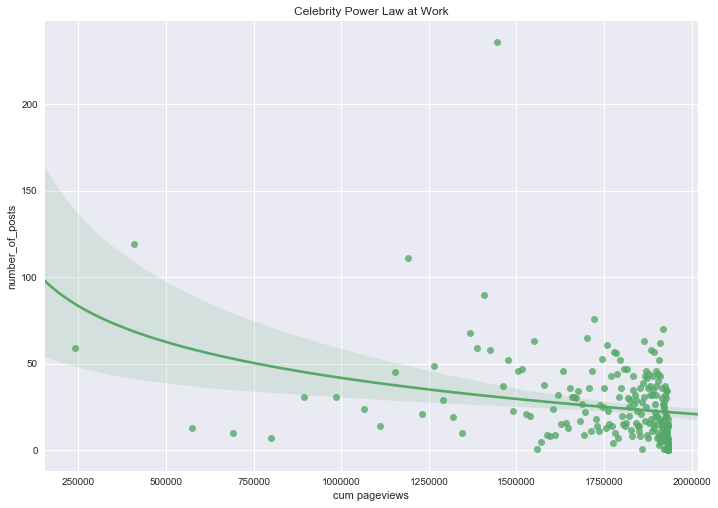

In [2]:
fig, ax = plt.subplots()
ax.set_title('Celebrity Power Law at Work')
fig.set_size_inches(11.7, 8.27)
sns.regplot(x=df["cum pageviews"], y=df["number_of_posts"], color="g",logx=True, ax=ax)


## What Happened In Real Life to Prediction Model

## (Note Millions of Dollars are behind this model!)
![Predicted vs Actual](https://user-images.githubusercontent.com/58792/35465715-e5de43c2-02b2-11e8-9a9e-104d9eca387e.png)

# Actual Pageviews After ML Model Goes Live
![Actual Pageviews](https://user-images.githubusercontent.com/58792/35465722-f077040e-02b2-11e8-87bf-1a17426b7dcb.png)


## ML Web Applications Also Created

### Good example of clustering business use case in Action
### Works as a companion to ML model (helping explain it further)
![ML Web Appplication](https://user-images.githubusercontent.com/58792/35465731-fa6d6c28-02b2-11e8-8d9d-af142a5448e2.png)


## Break:  7pm-7:15pm

## Lecture Linear Regression Part 2: 7:15pm-7:45pm


### Generalized Linear Models

Predict Y hat

![Mathmatical Notation](http://scikit-learn.org/stable/_images/math/334dd847bce79ed52a760f02b3efd8faefdb6e8b.png)

### Linear Regression is the 800 lb Gorilla prediction

* Never a bad place to start
* Can even think about linear regression as a form of EDA
* Even against some non-linear data it is performs ok

![Gorilla](https://user-images.githubusercontent.com/58792/35466062-87d9d64e-02b5-11e8-8614-5f78ae9c737e.jpg)

## What is linear regression used for?

* One view of machine learning is that ML consists of development of regression models with the Prediction goal
(matloff)
* Predicting a continuous variable
* Forecasting the future

![Linear Regression](http://scikit-learn.org/stable/_images/sphx_glr_plot_ols_001.png)

## Libraries for ML based Linear Regression
* In Python [scikit-learn](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html).  Many different techniques to explore.

- Ordinary Least Squares
- Ridge Regression
- Lasso
- Bayesian Regression
- Robustness regression

* In R [Caret](https://topepo.github.io/caret/model-training-and-tuning.html)
- knnRegression
- (too many to mention)
- Lots of help with [splitting data] (https://topepo.github.io/caret/data-splitting.html)




## Biggest Takeaways from classic linear regression

* Use cross-fold validation techniques
* Judge performance using metrics like RMSE (Root Mean Square Error) vs R-Squared and P-Value

## Exploration of Zillow Home Prices 


## Project Team Case Study: Predicting Home Prices: 7:45pm-8:30pm

* Do a Github Fork of The Machine Learning for Real Estate Notebook:  https://github.com/noahgift/real_estate_ml.
* Work off the explore_zillow_data_sets.ipynb notebook and create two regression predictions:

- Predict Home Prices in a zip code:  i.e. 94901
- Predict Median Home Prices for United States

* Submit link to project in Canvas
